
# pyplot基础图表函数概述

## 16种图表函数

| 函数                                    | 说明                           |
| :--------------------------------------- |:------------------------------: |
| `plt.plot(x,y,fmt...)`                  | 绘制一个坐标图                 |
| `plt.boxplot(data, notch, position)`    | 绘制一个箱型图                 |
| `plt.bar(left, height, width, bottom)`  | 绘制一个条形图                 |
| `plt.barh(width, bottom, left, height)` | 绘制一个横向条形图             |
| `plt.polar(theta, r)`                   | 绘制极坐标图                   |
| `plt.pie(data, explode)`                | 绘制饼图                       |
| `plt.psd(x, NFFT=256, pad_to, Fs)`      | 绘制功率谱密度图               |
| `plt.specgram(x, NFFT=256, Fs)`         | 绘制谱图                       |
| `plt.cohere(x, y, NFFT=256, Fs)`        | 绘制X-Y的相干性函数            |
| `plt.scatter(x,y)`                      | 绘制散点图，其中，x和y长度相同 |
| `plt.step(x, y, where)`                 | 绘制步阶图                     |
| `plt.hist(x, bins, normed)`             | 绘制直方图                     |
| `plt.contour(X, Y, Z, N)`               | 绘制等值图                     |
| `plt.vlines()`                          | 绘制垂直图                     |
| `plt.stem(x, y, linefmt, markerfmt)`    | 绘制柴火图                     |
| `plt.plot_date()`                       | 绘制数据日期                   |

****
# pyplot饼图的绘制

适合展示带有百分比的数据

## 饼图实例

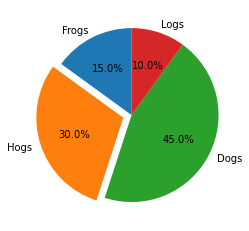

In [19]:
import matplotlib.pyplot as plt

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

plt.show()


`sizes`：每块的尺寸

`explode`：指出了哪一块该突出出来

`labels`：每一块对应的标签

`autopct`：表示中间显示百分数的方式

`shadow`：二维饼图还是带有阴影的饼图效果

`startangle`：起始角度

## 正圆形饼图


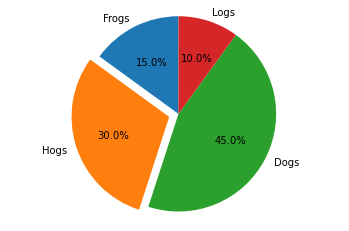

In [16]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs' #tuple
sizes = [15,30,45,10]
explode =( 0, 0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

plt.axis('equal')
plt.show()

`plt.axis('equal')`表示绘制饼图的时候，x和y轴是相等的，饼图变成正圆形

****



# pyplot直方图的绘制

## 直方图`plt.hist()`


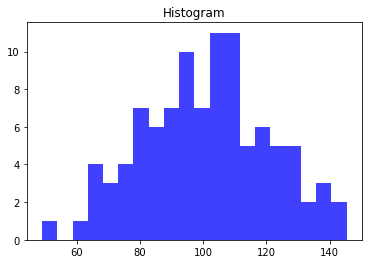

In [34]:
import numpy as np

np.random.seed(0)
mu, sigma = 100, 20 # mean and variance
a = np.random.normal(mu, sigma, size=100)

plt.hist(a, 20, histtype='stepfilled', facecolor='b', alpha=0.75)
plt.title('Histogram')

plt.show()

使用随机种子0，使用numpy的`random.normal()`函数生成一个方差和均值给定的正态分布的数组a，然后对这个数组a绘制直方图



### 参数`bin`

在之前的语句中：

```python
plt.hist(a, 20, normed=1, histtype='stepfilled', facecolor='b', alpha=0.75)
```

第二个参数叫`bin`，表示的是在生成的图形中，直方的个数

如果设置成10，代表在生成的图像中，共有10个直立的方形



### 直方图的原理

对于一个数组a，它有若干个元素（在例子中有100个元素），其中有最小值和最大值，其间有取值范围，直方图就是在这个取值范围直接，均等地划分`bin`个区间（例子中是20个）

这样，原来的100个元素就会在新的20个区间重新分布，不过这些元素并不是等分在区间中的

比如根据正态分布，数字100附近的元素数量是最多的

这样，每个区间包含的原来数组的元素数量就构成了直方图的高度

直方图越高，代表对应区间的元素数量越多



### 参数`normed`(该属性已取消)

如果设为1，就把区间中元素的数量归一化后，用概率表示，纵坐标是小数表示的

如果设为0，那么纵坐标就是在对应区间元素的个数



### 直方图的作用

通过直方图，可以把一个数组从最低到最高之间，将对应元素的个数绘制成方形，展示出来

把元素的个数和数值反映出来

****



# pyplot极坐标图的绘制

## 极坐标图的绘制

### 代码

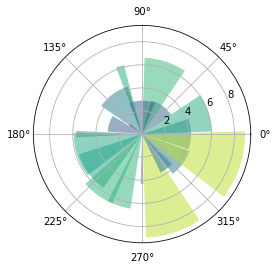

In [35]:
N = 20
theta = np.linspace(0.0, 2*np.pi, N, endpoint=False)
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)

ax = plt.subplot(111,projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii,bars):
    bar.set_facecolor(plt.cm.viridis(r/10.))
    bar.set_alpha(0.5)
    
plt.show()


### 生成数组

N表示绘制极坐标图的数据个数

使用`linespace()`从0到360度按照数据个数，等分出N个不同的角度

使用`random.rand()`函数生成一个对应个数的0到1之间的随机数组，乘10得到每一个角度值

再给出四分之pi乘以随机数组得到宽度值



### 极坐标图的参数

这里没有使用`plt.polar()`函数

而是使用`subplot()`函数，分割范围是111，表示在一个区域中绘制，把参数`projection`设为`polar`表示绘制的是极坐标图，把这个绘图区域形成一个对象叫`ax`，采用面向对象的方法绘制极坐标图

对这个绘图区域使用`.bar()`方法，输入了3个参数，分别是极坐标的`theta`，`rad`和`width`，这三个参数对应`plt.polar()`函数的`left`，`height`和`width`三个参数

`left`指的是绘制极坐标系中颜色区域的时候从哪里开始，指图中的某一个位置

`height`是从中心点向边缘绘制的长度，在这里是0到1的随机数与10相乘得到的结果设定为长度

`width`是每一个绘图区域的面积

使用`ax.bar()`函数就是绘制极坐标图



### 设定颜色

使用`for`循环对每一个绘图区域的颜色进行设定

****



# pyplot散点图的绘制

## 另一种方法绘制散点图：面向对象


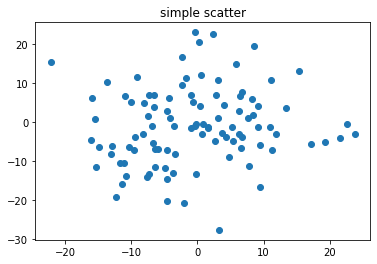

In [36]:
fig,ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100),'o')
ax.set_title('simple scatter')

plt.show()

### 代码解释

将`subplots()`函数变为对象

`subplots()`函数返回的值是元组，包含两个元素，第一个是画布，第二个是子图

可以使用`.plot`函数和`plt.show()`函数绘制和显示图像

参考`https://blog.csdn.net/sinat_35930259/article/details/80002213`

在这里，使用两个参数`fig`和`ax`分别表示生成的图表和图表的区域

当`subplots()`默认给出的参数是空的时候，表明它的绘制区域是111，也就是只有1个绘制区域，对应的对象`ax`
对`ax`使用`.plot`函数来绘制其中的点

使用`.randn()`函数生成100个正态分布的点，同时乘以10，使得这些点散得更开一些，把这些点作为X轴的参数

同时在Y轴对应的数值上也生成100个点

把每个对应的数据标注为`o`，一个点

设置标题并绘制图像